# Name: Adya Agrawal

## Machine learning

### Importing libraries

In [3]:
# basic manipulation and formation of data frames 
import pandas as pd
import numpy as np

# visaulization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# modelling libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# model evaluation libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

### Exploratory Data Analysis

In [4]:
d= pd.read_csv('ML_TASK_CSV.csv')
d.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
d.drop('RowNumber',axis=1, inplace=True) #unnecessary column
d.drop('Surname',axis=1, inplace=True) #unnecessary column
d.drop('CustomerId',axis=1, inplace=True)
d.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
d.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
d.Tenure.unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

In [8]:
d.NumOfProducts.unique()

array([1, 3, 2, 4], dtype=int64)

In [9]:
exited=d.Exited.tolist()
d['exited']=[('Yes' if a>0 else 'No') for a in exited]
d.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Yes
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,No
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Yes
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,No
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,No


In [10]:
d['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [8]:
d.corr()['Exited']

CreditScore       -0.027094
Age                0.285323
Tenure            -0.014001
Balance            0.118533
NumOfProducts     -0.047820
HasCrCard         -0.007138
IsActiveMember    -0.156128
EstimatedSalary    0.012097
Exited             1.000000
Name: Exited, dtype: float64

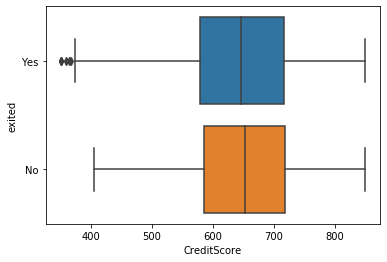

In [9]:
sns.boxplot(x='CreditScore',y='exited',data=d)

#### Correlation matrix and the plot shows that credit score has almost no effect on output. 

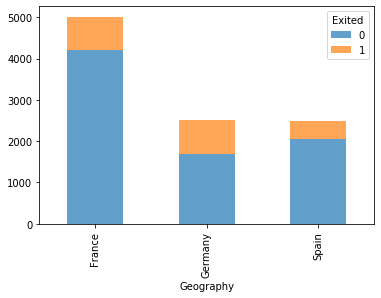

In [10]:
geography = d.groupby(['Geography','Exited']).Geography.count().unstack()
p1 = geography.plot(kind = 'bar', stacked = True, alpha = .70)
plt.show()

#### Plot shows that more customers in france have exited as compared to germany and least amount of customers have exited in spain

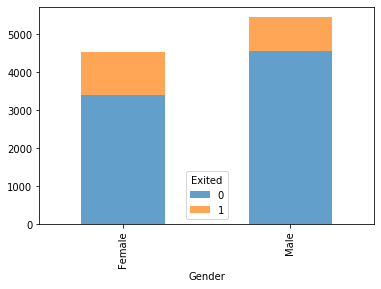

In [11]:
gender = d.groupby(['Gender','Exited']).Gender.count().unstack()
p1 = gender.plot(kind = 'bar', stacked = True, alpha = .70)
plt.show()

#### Correlation matrix and the plot shows that more females exited as compared to males

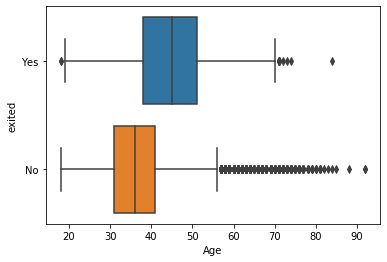

In [12]:
sns.boxplot(x='Age',y='exited',data=d)

#### Correlation matrix and the plot shows that more aged customers have exited more

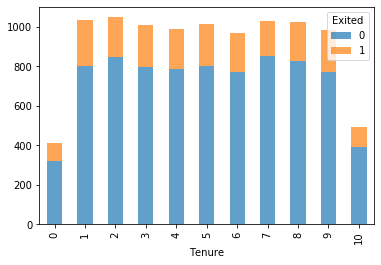

In [13]:
tenure = d.groupby(['Tenure','Exited']).Tenure.count().unstack()
p2 = tenure.plot(kind = 'bar', stacked = True, alpha = .70)
plt.show()

#### Correlation matrix and the plot shows that tenure has almost no effect on output. 

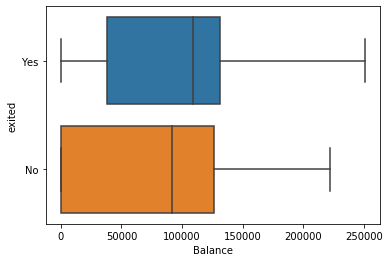

In [14]:
sns.boxplot(x='Balance',y='exited',data=d)

#### Correlation matrix and the plot shows that customers with more balance have exited more

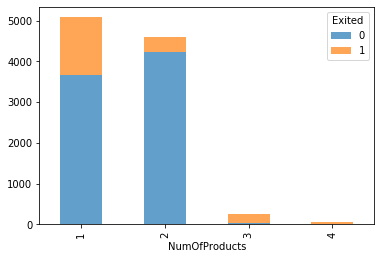

In [15]:
nop = d.groupby(['NumOfProducts','Exited']).NumOfProducts.count().unstack()
p3 = nop.plot(kind = 'bar', stacked = True, alpha = .70)
plt.show()

#### The exact relation between number of products and exited status is not visible. However in 3 and 4 products most customers have exited while amongst 1 and 2 more customers have exited in 1

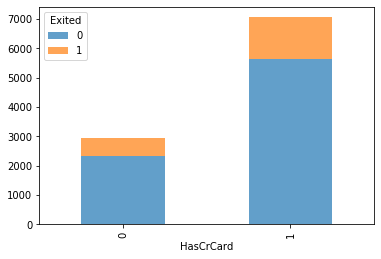

In [16]:
hcc = d.groupby(['HasCrCard','Exited']).HasCrCard.count().unstack()
p4 = hcc.plot(kind = 'bar', stacked = True, alpha = .70)
plt.show()

#### Correlation matrix and the plot shows that credit card has almost no effect on output. 

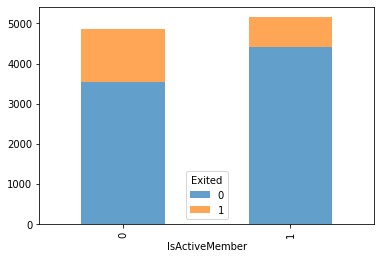

In [17]:
iaa = d.groupby(['IsActiveMember','Exited']).IsActiveMember.count().unstack()
p4 = iaa.plot(kind = 'bar', stacked = True, alpha = .70)
plt.show()

#### Correlation matrix and the plot shows that not active customers have exited more

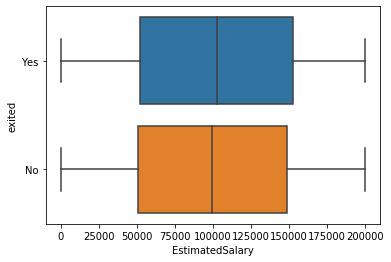

In [18]:
sns.boxplot(x='EstimatedSalary',y='exited',data=d)

#### Correlation matrix and the plot shows that customers with higher salary have exited more.

In [19]:
d.drop('exited',axis=1, inplace=True) #unnecessary column

In [20]:
#getting all string datatype columns to int or float
g=d.Gender.tolist()
d['gender']=[(1 if a=='Male' else 0) for a in exited]
geo=d.Geography.tolist()
d['geography']=[(1 if a=='France' else 2 if a=='Spain' else 3)for a in geo]
d.drop('Gender',axis=1, inplace=True) 
d.drop('Geography',axis=1,inplace=True)
d.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,gender,geography
0,619,42,2,0.00,1,1,1,101348.88,1,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,2
2,502,42,8,159660.80,3,1,0,113931.57,1,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,0,1
4,850,43,2,125510.82,1,1,1,79084.10,0,0,2


### Conclusions of EDA

1)Credit Score,Tenure and having credit card do not have much effect on output but for the sake of accuracy I will be considering these features as well.

2)More customers in france have exited as compared to germany and least amount of customers have exited in spain.

3)More females exited as compared to males.

4)More aged customers have exited more.

5)Customers with more balance have exited more.

6)In 3 and 4 products most customers have exited while amongst 1 and 2 more customers have exited in 1

7)Not active customers have exited more.

8)Customers with higher salary have exited more.

### Data Splitting and Model training

In [21]:
x_train, x_test, y_train, y_test = train_test_split(d.loc[:, d.columns != 'Exited'], d[['Exited']],
                                                    test_size=0.3,
                                                    random_state=0,
                                                    stratify=d[['Exited']])

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

#### Logistic regression

In [23]:
log = LogisticRegression()
lr = log.fit(X_train, y_train)
y_pred = lr.predict(X_test)

log_acc = accuracy_score(y_test, y_pred)
log_f1 = f1_score(y_test, y_pred, average = 'macro')

print('Accuracy of model on testing data is', log_acc)
print('F1 Score of model on testing data is', log_f1)

Accuracy of model on testing data is 0.8146666666666667
F1 Score of model on testing data is 0.5981880884448723


C:\Users\Adya\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Random Forest Classifier

In [24]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train) # predictions
rfc_predict = rfc.predict(X_test)

rfc_acc = accuracy_score(y_test, rfc_predict)
rfc_f1 = f1_score(y_test, rfc_predict, average = 'macro')

print('Accuracy of model on testing data is', rfc_acc)
print('F1 Score of model on testing data is', rfc_f1)

C:\Users\Adya\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy of model on testing data is 0.8613333333333333
F1 Score of model on testing data is 0.7479732851682279


## Thus it can be observed that Random forest classifier has higher accuracy in classifying this data
